In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CAS       779 non-null    object 
 1   SMILES    779 non-null    object 
 2   Set       779 non-null    object 
 3   nHM       779 non-null    int64  
 4   piPC09    779 non-null    float64
 5   PCD       779 non-null    float64
 6   X2Av      779 non-null    float64
 7   MLOGP     779 non-null    float64
 8   ON1V      779 non-null    float64
 9   N-072     779 non-null    int64  
 10  B02[C-N]  779 non-null    int64  
 11  F04[C-O]  779 non-null    int64  
 12  Class     779 non-null    int64  
 13  logBCF    779 non-null    float64
dtypes: float64(6), int64(5), object(3)
memory usage: 85.3+ KB


<AxesSubplot:>

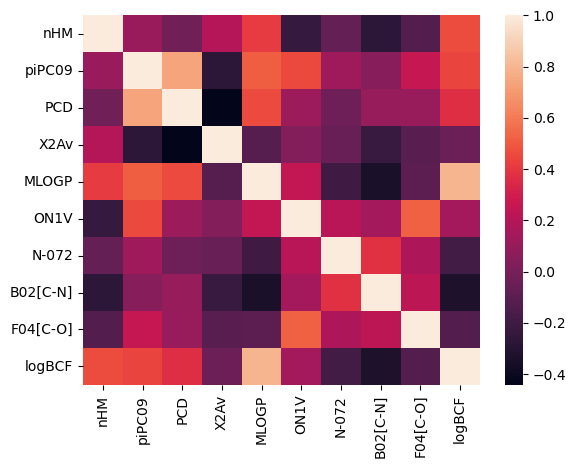

In [2]:
#Trying to predict Bioconcentration Factor (BCF) in log units

#reading dataset csv (Regression)
data=pd.read_csv(r'C:\Users\kayla\BMEN_FinalProject\Regression_Data_Set.csv')
data.info()

#Drop Data
data = data.drop('CAS', axis=1)
data = data.drop('SMILES', axis=1)
data = data.drop('Set', axis=1)
data = data.drop('Class', axis=1)

target=['logBCF']
y=data['logBCF']
X=data.loc[:,data.columns !='logBCF']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=32)
x_train[x_train.isnull().any(axis=1)]

sns.heatmap(data.corr( ), annot=False)

Training R2, Lasso Model:  0.6558628809816129
Testing R2, Lasso Model:  0.5390402105673457
RMSE, Train:  0.806790668421425
RMSE, Test:  0.8459545291607629


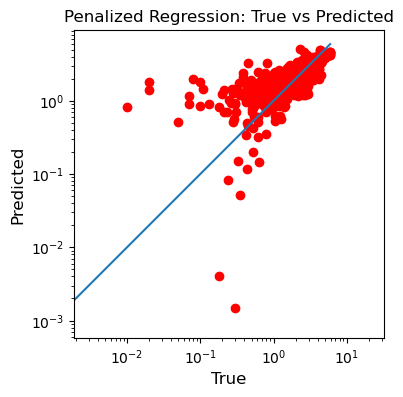

In [3]:
#Penalized model - Lasso (Regression)
lm = linear_model.Lasso(alpha=0.2)

lm.fit(x_train, y_train)

#y_pred_train = lm.predict(x_train)
#y_pred_test = lm.predict(x_test)

y_pred_train = cross_val_predict(lm,x_train,y_train,cv=5)
y_pred_test = cross_val_predict(lm, x_test, y_test, cv=5)

accuracy_train = r2_score(y_train, y_pred_train)
print("Training R2, Lasso Model: ", accuracy_train)
accuracy_test = r2_score(y_test, y_pred_test)
print("Testing R2, Lasso Model: ", accuracy_test)
RMSE_train = sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE, Train: ", RMSE_train)
RMSE_test = sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE, Test: ", RMSE_test)

true_val = y_train
pred_val = y_pred_train

plt.figure(figsize=(4,4))
plt.scatter(true_val, pred_val, c='red')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(pred_val), max(true_val))
p2 = min(min(pred_val), min(true_val))
plt.plot([p1, p2], [p1, p2], '-')
plt.xlabel('True', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.title("Penalized Regression: True vs Predicted")
plt.axis('equal')
plt.show()

C:\Users\kayla\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\kayla\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\kayla\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\kayla\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\kayla\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and 

Training R2, Boosted Model:  0.6942334933532751
Testing R2, Boosted Model:  0.6242395417343922
RMSE Train:  0.578335865147179
RMSE Test:  0.5833672900217718


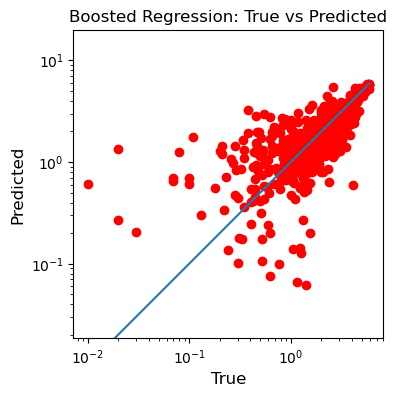

In [4]:
#Boosted (Regression)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.2, max_depth=5, random_state=0, loss='ls')

gbr.fit(x_train, y_train)

#y_pred_train = gbr.predict(x_train)
#y_pred_test = gbr.predict(x_test)

y_pred_train = cross_val_predict(gbr,x_train,y_train,cv=5)
y_pred_test = cross_val_predict(gbr,x_test, y_test, cv=5)

accuracy_train = r2_score(y_train, y_pred_train)
print("Training R2, Boosted Model: ", accuracy_train)
accuracy_test = r2_score(y_test, y_pred_test)
print("Testing R2, Boosted Model: ", accuracy_test)
Rmse_train = mean_squared_error(y_train, y_pred_train)
print("RMSE Train: ", Rmse_train)
Rmse_test = mean_squared_error(y_test, y_pred_test)
print("RMSE Test: ", Rmse_test)

true_val = y_train
pred_val = y_pred_train

plt.figure(figsize=(4,4))
plt.scatter(true_val, pred_val, c='red')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(pred_val), max(true_val))
p2 = min(min(pred_val), min(true_val))
plt.plot([p1, p2], [p1, p2], '-')
plt.xlabel('True', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.title("Boosted Regression: True vs Predicted")
plt.axis('equal')
plt.show()

Training R2, Polynomial:  0.5111954020556289
Testing R2, Polynomial:  0.3772390796006916
RMSE Train:  0.9615297994169626
RMSE Test:  0.9832776655279355


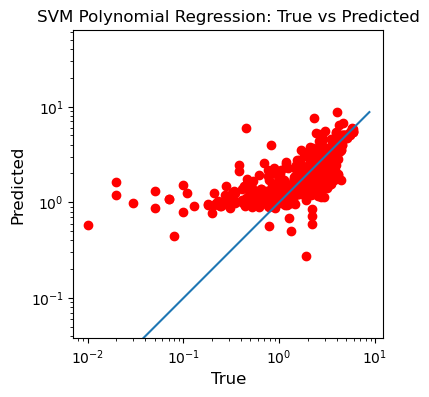

In [5]:
#Svm - polynomial (Regression)
svm = SVR(kernel='poly', degree=3, C=1.0, epsilon=0.2)
svm.fit(x_train, y_train)

y_pred_train = cross_val_predict(svm,x_train,y_train,cv=5)
y_pred_test = cross_val_predict(svm,x_test, y_test, cv=5)

accuracy_train = r2_score(y_train, y_pred_train)
print("Training R2, Polynomial: ", accuracy_train)
accuracy_test = r2_score(y_test, y_pred_test)
print("Testing R2, Polynomial: ", accuracy_test)
rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE Train: ", rmse_train)
rmse_test = sqrt(mean_squared_error(y_test,y_pred_test))
print("RMSE Test: ", rmse_test)

true_val = y_train
pred_val = y_pred_train

plt.figure(figsize=(4,4))
plt.scatter(true_val, pred_val, c='red')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(pred_val), max(true_val))
p2 = min(min(pred_val), min(true_val))
plt.plot([p1, p2], [p1, p2], '-')
plt.xlabel('True', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.title("SVM Polynomial Regression: True vs Predicted")
plt.axis('equal')
plt.show()


In [6]:
#reading dataset csv (Classification)
data=pd.read_csv(r'C:\Users\kayla\BMEN_FinalProject\Classification_Data_Set.csv')
data.info()

data = data.drop('id', axis=1)
target=['diagnosis']
y=data['diagnosis']
X=data.loc[:,data.columns !='diagnosis']

#x = data.drop(["id","diagnosis"],axis=1)
#y=data.diagnosis.values
#data['diagnosis'].value_counts()

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=55)
x_train[x_train.isnull().any(axis=1)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


Training Accuracy, Basic Tree:  0.9274725274725275
Testing Accuracy, Basic Tree:  0.9298245614035088
[[61  4]
 [ 4 45]]
              precision    recall  f1-score   support

           B       0.94      0.94      0.94        65
           M       0.92      0.92      0.92        49

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



<AxesSubplot:>

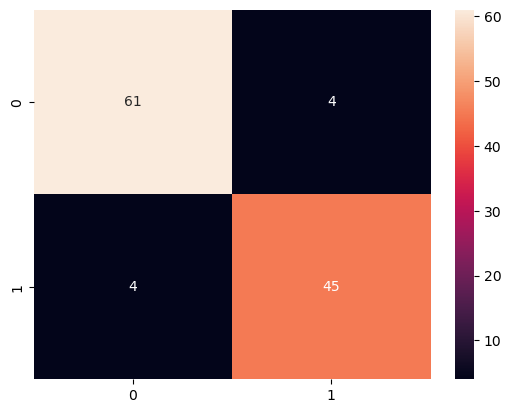

In [7]:
#Decision Tree (Classification)
cf = DecisionTreeClassifier(max_depth=3)
cf.fit(x_train, y_train)

y_pred_train = cross_val_predict(cf, x_train, y_train, cv=5)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy, Basic Tree: ", train_accuracy)

y_pred_test = cross_val_predict(cf, x_test, y_test, cv=5)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy, Basic Tree: ", test_accuracy)

print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True)


Training Accuracy, SVM Linear:  0.9538461538461539
Testing Accuracy, SVM Linear:  0.956140350877193
[[62  3]
 [ 2 47]]
              precision    recall  f1-score   support

           B       0.97      0.95      0.96        65
           M       0.94      0.96      0.95        49

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



<AxesSubplot:>

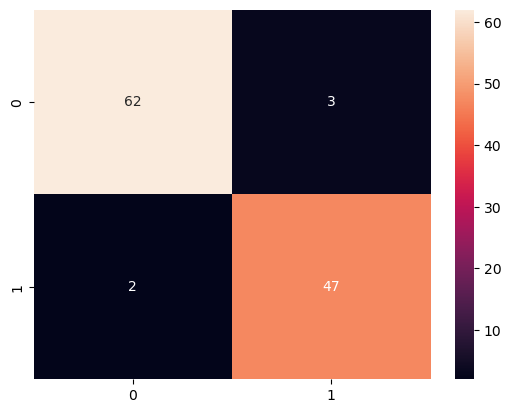

In [8]:
# SVM model (linear)
cl = SVC(kernel='linear')
cl.fit(x_train, y_train)

y_pred_train = cross_val_predict(cl, x_train, y_train, cv=5)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy, SVM Linear: ", train_accuracy)

y_pred_test = cross_val_predict(cl, x_test, y_test, cv=5)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy, SVM Linear: ", test_accuracy)

print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True)

C:\Users\kayla\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\kayla\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\kayla\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training Accuracy, Lasso Logistic Regression:  0.9538461538461539
Testing Accuracy, Lasso Logistic Regression:  0.9473684210526315
[[63  2]
 [ 4 45]]
              precision    recall  f1-score   support

           B       0.94      0.97      0.95        65
           M       0.96      0.92      0.94        49

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



<AxesSubplot:>

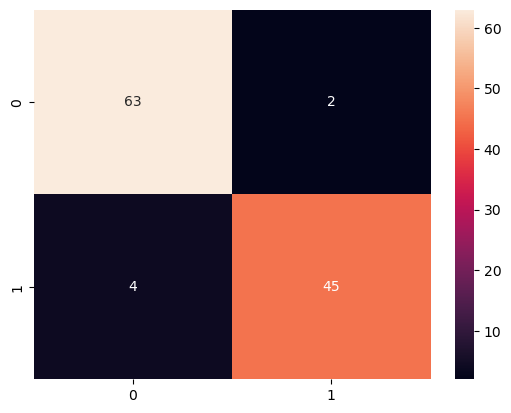

In [9]:
#Penalized (lasso)
cf = LogisticRegression(penalty='l1', C=1, solver='liblinear')
cf.fit(x_train, y_train)

y_pred_train = cross_val_predict(cf, x_train, y_train, cv=5)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy, Lasso Logistic Regression: ", train_accuracy)

y_pred_test = cross_val_predict(cf, x_test, y_test, cv=5)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy, Lasso Logistic Regression: ", test_accuracy)

print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True)
